In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
letter_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
               'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

### Job 3.3

In [3]:
with open('data.txt', 'r') as f :
    data = f.read()

In [4]:
x = re.findall('\w+', data)
print('Number of words :', len(x))

Number of words : 1175248


### Job 3.4

In [5]:
num = int(input('Size of string :'))
x = re.findall('\w+', data)
c = 0
for word in x :
    if len(word)==num :
        c += 1
print(f'Number of words of size {num} :', c)

Number of words of size 4 : 180230


### Job 3.5

<BarContainer object of 26 artists>

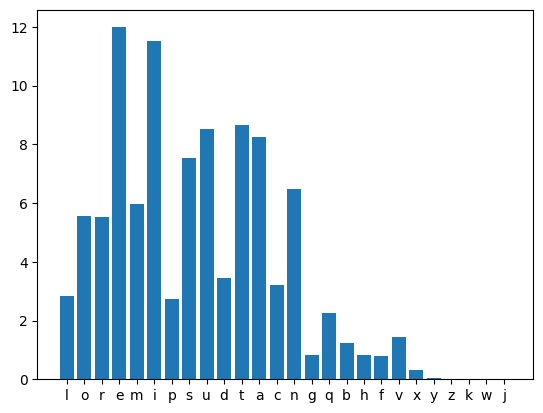

In [6]:
x = list(map(lambda x : x.lower(), re.findall(r'[a-zA-Z]', data)))
dic = {}
for char in x :
    if char in dic.keys() :
        dic[char] += 1
    else :
        dic[char] = 1
keys = dic.keys()
num = [dic[char]/len(x)*100 for char in keys]
plt.bar(keys, num)

### Job 3.5 bis

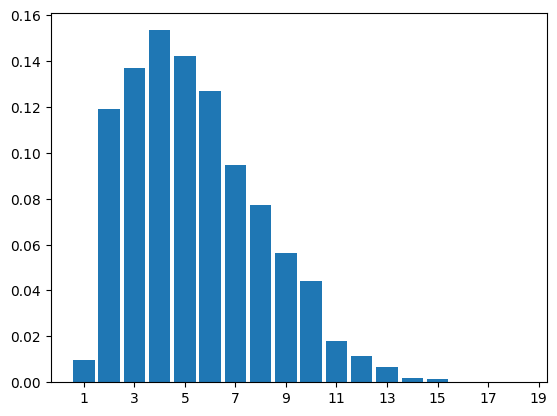

In [7]:
x = list(map(lambda w : len(w), re.findall('\w+', data)))
stat_length = plt.hist(x, bins=range(1, 20), align='left', rwidth=0.85, density=True)[0]
ticks = plt.xticks(range(1, 20, 2))
stat_length_abs = list(range(1, 19))

### Job 3.6

In [8]:
x = list(map(lambda x : x.lower(), re.findall('([a-zA-Z])(?:\w*)', data)))
dic = {}
for char in x :
    if char in dic.keys() :
        dic[char] += 1
    else :
        dic[char] = 1
keys = dic.keys()
num = [dic[char]/len(x)*100 for char in keys]
#plt.bar(keys, num)

stat_first = []
stat_first_abs = []
for letter in letter_list[:26] :
    stat_first_abs.append(letter)
    if letter in dic.keys() :
        stat_first.append(dic[letter]/len(x))
    else :
        stat_first.append(0)

<BarContainer object of 26 artists>

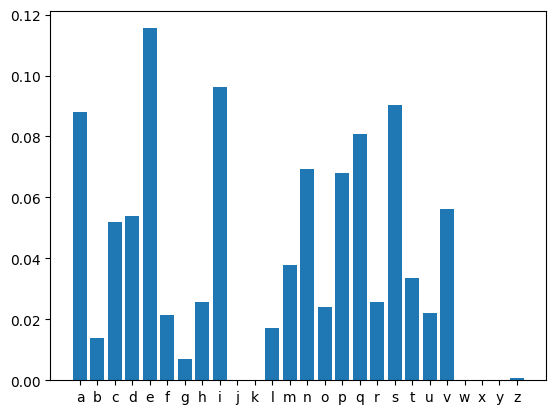

In [9]:
plt.bar(stat_first_abs, stat_first)

### Job 3.7

In [10]:
def following_letter(data, letter) :
    x = re.findall(f'(?:[{letter}])([a-zA-Z])', data)
    dic = {}
    for char in x :
        if char in dic.keys() :
            dic[char] += 1
        else :
            dic[char] = 1
    return(dic)

def following_alphabet(data, letter_list=letter_list) :
    res = {}
    for letter in letter_list :
        dic = following_letter(data, letter)
        followers_number = []
        for char in letter_list :
            if char in dic.keys() :
                followers_number.append(dic[char])
            else :
                followers_number.append(0)
        num_tot = sum(followers_number)
        if not num_tot==0 :
            followers_number = list(map(lambda x : x/num_tot, followers_number))
        res[letter] = followers_number
    return(res)

In [11]:
followers = following_alphabet(data)

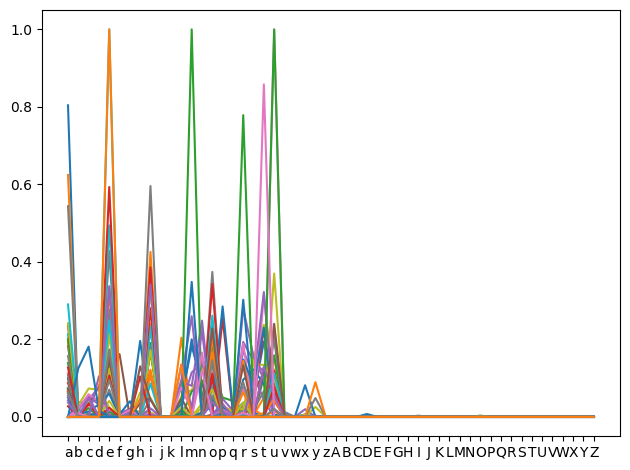

In [12]:
plt.figure()
for key in followers.keys() :
    plt.plot(letter_list, followers[key])
plt.tight_layout()
plt.show()

### Job 3.8

In [13]:
def generate_word() :
    length = np.random.choice(stat_length_abs, p=stat_length)
    word = np.random.choice(stat_first_abs, p=stat_first)
    for i in range(1,length) :
        word += np.random.choice(letter_list, p=followers[word[-1]])
    return(word)

In [14]:
generate_word()

'nff'

### Job 3.9

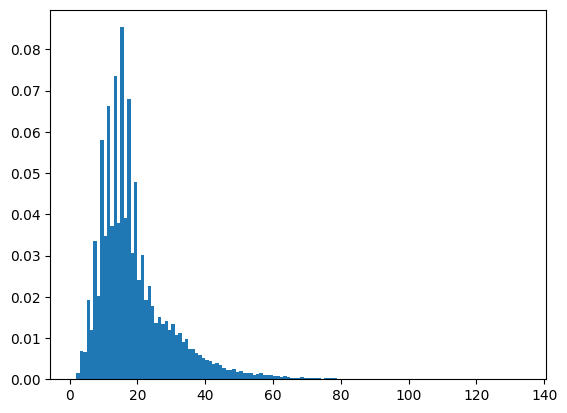

In [15]:
length_phrases = list(map(lambda phrase : len(re.findall('\w+', phrase)), re.split('\s*\.\s*', data)))
tuple_word = plt.hist(length_phrases, bins=range(1, 135), density=True)
stat_number_word = tuple_word[0]
stat_number_word_abs = tuple_word[1][:-1]

In [16]:
def generate_phrase() :
    phrase_length = int(np.random.choice(stat_number_word_abs, p=stat_number_word))
    phrase = ''
    for i in range(phrase_length) :
        phrase += generate_word()+' '
    return(phrase)


In [17]:
generate_phrase()

'enautip sieg veat sus stau ptr f tuanan fi ssiure ff equrri eumin viu visus dexpur prilup lilllil quiss etipo qudesfel '